In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
bike_data = pd.read_csv('london_merged.csv')
bike_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
bike_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [5]:
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
bike_data['timestamp'] = bike_data['timestamp'].astype('datetime64[ns]')


In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [8]:
bike_data.shape


(17414, 10)

In [9]:
bike_data.isnull().sum()/len(bike_data) * 100


timestamp       0.0
cnt             0.0
t1              0.0
t2              0.0
hum             0.0
wind_speed      0.0
weather_code    0.0
is_holiday      0.0
is_weekend      0.0
season          0.0
dtype: float64

In [10]:
bike_data.nunique()


timestamp       17414
cnt              3781
t1                 73
t2                 82
hum               143
wind_speed        103
weather_code        7
is_holiday          2
is_weekend          2
season              4
dtype: int64

In [11]:
bike_data.duplicated().sum()


0

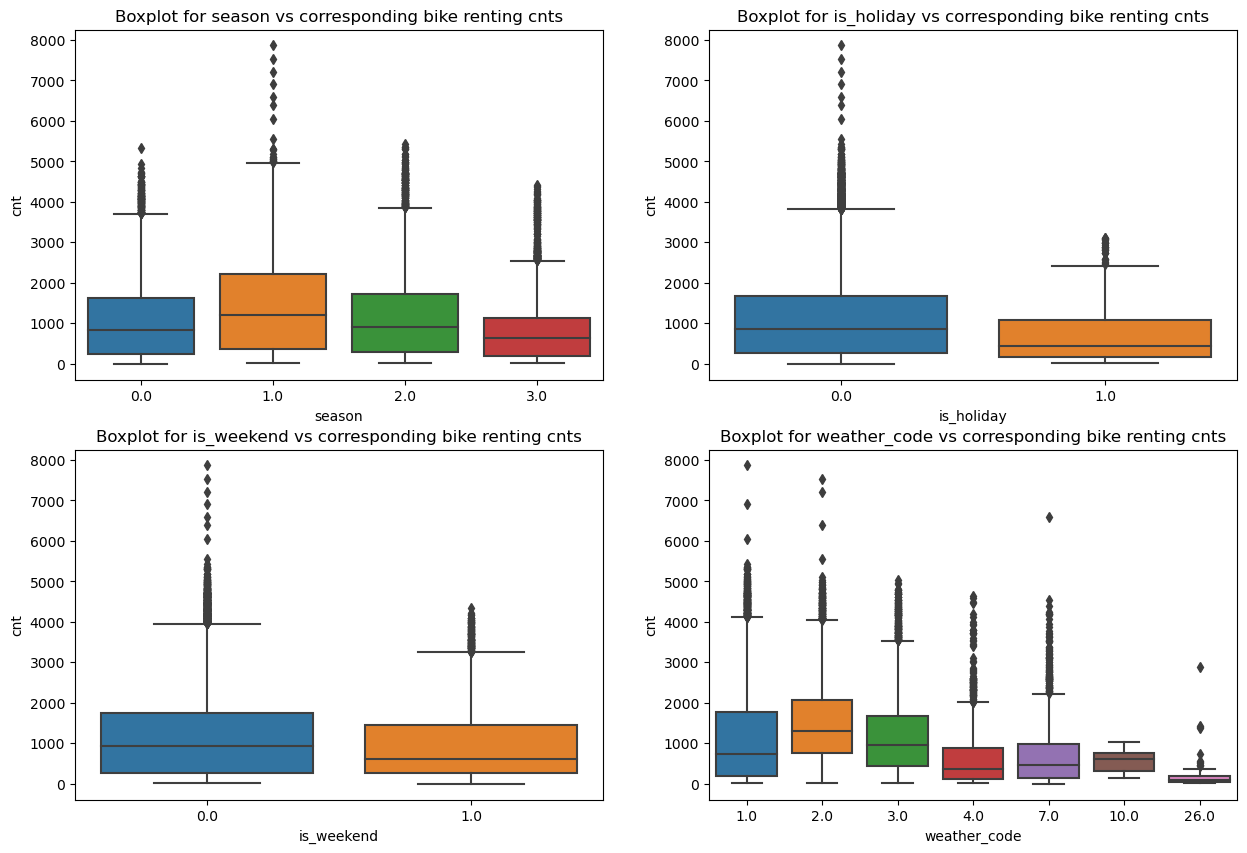

In [12]:
# Visualization before outlier removal
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'is_holiday', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for is_holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'is_weekend', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather_code', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for weather_code vs corresponding bike renting cnts')

plt.show()

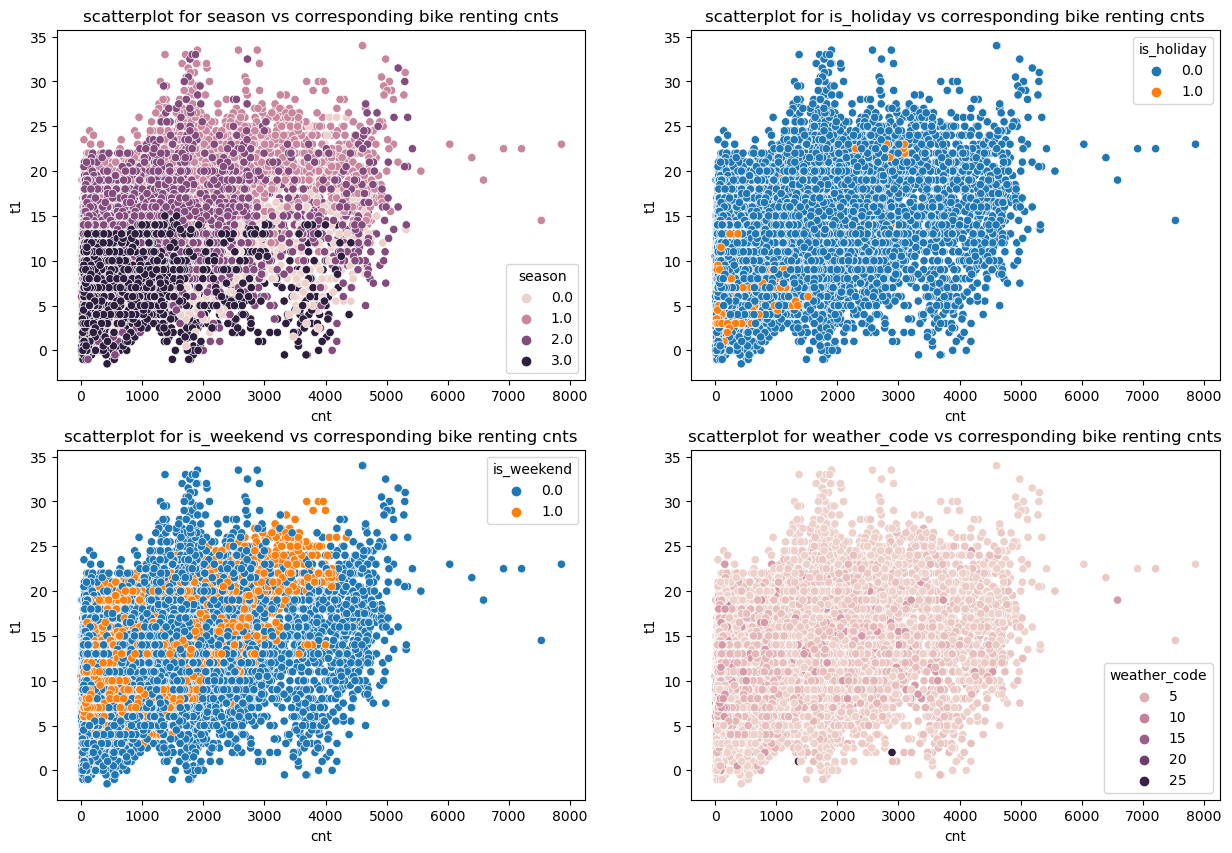

In [13]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='cnt', y = 't1', data = bike_data, hue ='is_holiday')
ax1.set_title('scatterplot for is_holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='is_weekend')
ax1.set_title('scatterplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'cnt',y = 't1',data = bike_data, hue ='weather_code')
ax1.set_title('scatterplot for weather_code vs corresponding bike renting cnts')

plt.show()

In [14]:
bike_dcopy = bike_data.copy() # Taken backup of orginial dataset before removing outliers


In [15]:
bike_dcopy

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [16]:
q1=bike_data['cnt'].quantile(0.25)
q3=bike_data['cnt'].quantile(0.75)
iqr=q3-q1
bike_data = bike_data[(bike_data['cnt'] >= q1 - 1.5*iqr) & (bike_data['cnt'] <= q3 +1.5*iqr)]
bike_data.shape

(16739, 10)

In [17]:
bike_dcopy.shape[0] - bike_data.shape[0]


675

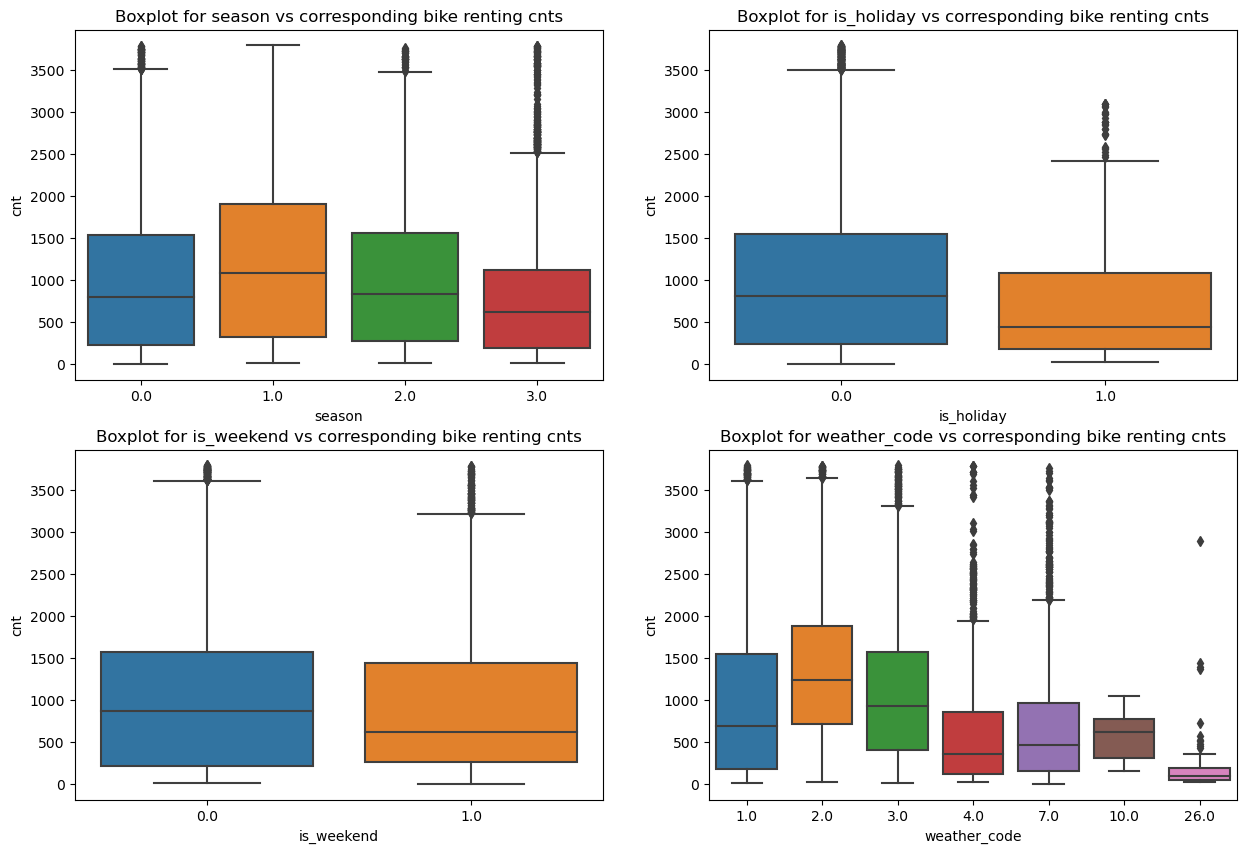

In [18]:
#Visualization after removing outliers
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'is_holiday', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for is_holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'is_weekend', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather_code', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for weather_code vs corresponding bike renting cnts')

plt.show()

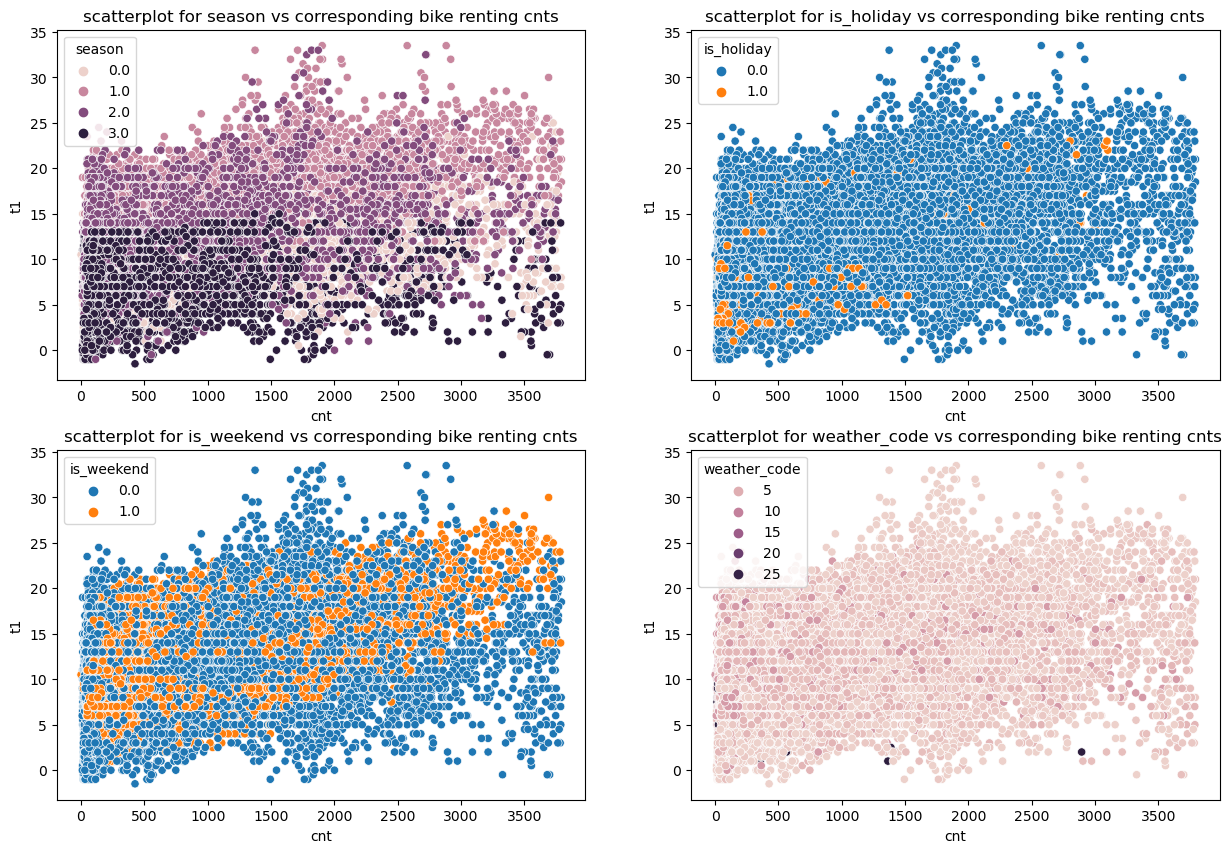

In [19]:
#Visualization after removing outliers
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='cnt', y = 't1', data = bike_data, hue ='is_holiday')
ax1.set_title('scatterplot for is_holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='is_weekend')
ax1.set_title('scatterplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'cnt',y = 't1',data = bike_data, hue ='weather_code')
ax1.set_title('scatterplot for weather_code vs corresponding bike renting cnts')

plt.show()

In [20]:
#creating a new dataframe for indexing timestamp
bike_datatime = pd.read_csv('london_merged.csv')
bike_datatime

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [21]:
bike_dcopy["timestamp"].sort_values() 


0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [22]:
bike_dcopy['Year'] = bike_dcopy['timestamp'].dt.year
bike_dcopy['Month'] = bike_dcopy['timestamp'].dt.month
bike_dcopy['Day'] = bike_dcopy['timestamp'].dt.day
bike_dcopy

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3


In [23]:
np.sort(bike_dcopy[bike_dcopy['cnt'] >= bike_dcopy['cnt'].quantile(0.75)]['Day'].unique())


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [24]:
bike_dcopy[bike_dcopy['cnt'] >= bike_dcopy['cnt'].quantile(0.95)]['Month'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [25]:
bike_dcopy['year'] = bike_dcopy['timestamp'].dt.year


In [26]:
bike_dcopy['month'] = bike_dcopy['timestamp'].dt.month


In [27]:
bike_dcopy.head()


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,2015,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,2015,1


In [28]:
year_data = bike_dcopy.groupby(['year'])['cnt'].sum()


In [29]:
year_data

year
2015     9738746
2016    10129546
2017       37680
Name: cnt, dtype: int64

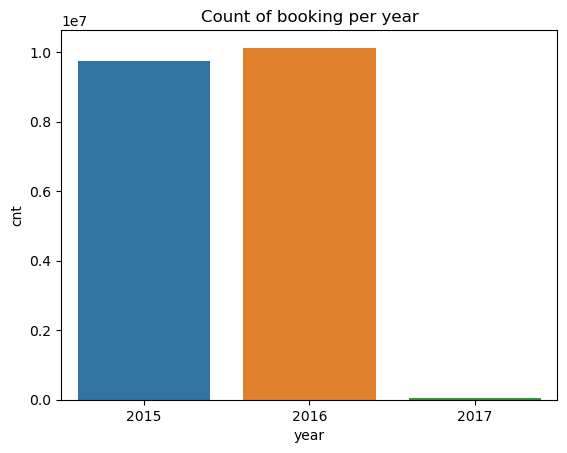

In [30]:
year_data = year_data.reset_index()
sns.barplot(x='year',y='cnt',data=year_data)
plt.title('Count of booking per year')
plt.show()

In [31]:
month_data = bike_dcopy.groupby(['month'])['cnt'].sum()


In [32]:
month_data

month
1     1166837
2     1136504
3     1352461
4     1600427
5     1897348
6     1967130
7     2286214
8     2171265
9     1891097
10    1800752
11    1381191
12    1254746
Name: cnt, dtype: int64

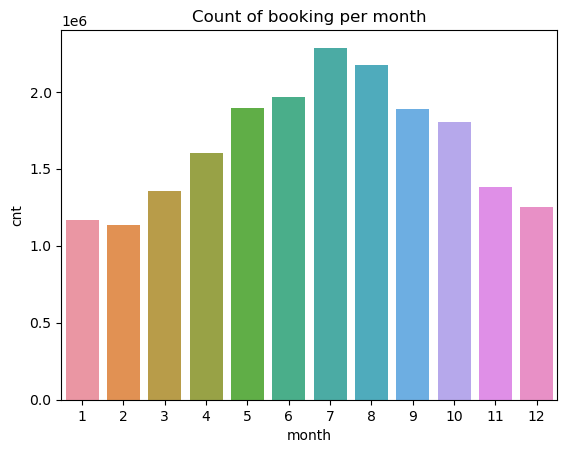

In [33]:
month_data = month_data.reset_index()
sns.barplot(x='month',y='cnt',data=month_data)
plt.title('Count of booking per month')
plt.show()

In [34]:
mon_year_data = bike_dcopy.groupby(['year','month'])['cnt'].sum()


In [35]:
mon_year_data = pd.DataFrame(mon_year_data)


In [36]:
mon_year_data

cnt
year month         
2015 1       546639
     2       543594
     3       695934
     4       831582
     5       895413
     6      1033252
     7      1120687
     8      1033951
     9       892478
     10      865046
     11      677332
     12      602838
2016 1       582518
     2       592910
     3       656527
     4       768845
     5      1001935
     6       933878
     7      1165527
     8      1137314
     9       998619
     10      935706
     11      703859
     12      651908
2017 1        37680

In [37]:
mon_year_data.reset_index(inplace = True)
myy = mon_year_data.pivot('month','year','cnt').fillna(0)

In [38]:
myy

year,2015,2016,2017
month,,,
1,546639.0,582518.0,37680.0
2,543594.0,592910.0,0.0
3,695934.0,656527.0,0.0
4,831582.0,768845.0,0.0
5,895413.0,1001935.0,0.0
6,1033252.0,933878.0,0.0
7,1120687.0,1165527.0,0.0
8,1033951.0,1137314.0,0.0
9,892478.0,998619.0,0.0


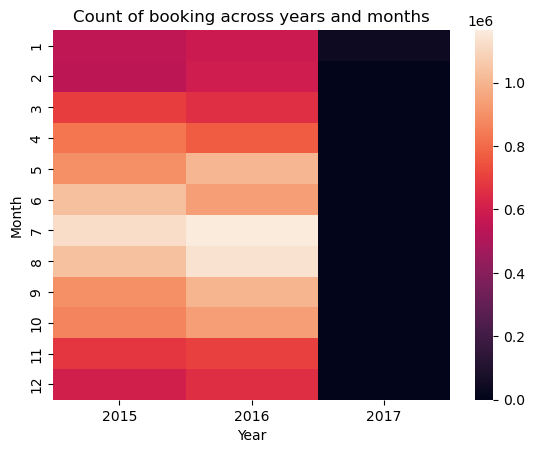

In [39]:
sns.heatmap(myy)
plt.title('Count of booking across years and months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [40]:
#Univariate analysis for numerical/continuos variables
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax[0], color = 'purple')
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='y',linestyle='solid',linewidth=2)
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [41]:
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16739 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     16739 non-null  datetime64[ns]
 1   cnt           16739 non-null  int64         
 2   t1            16739 non-null  float64       
 3   t2            16739 non-null  float64       
 4   hum           16739 non-null  float64       
 5   wind_speed    16739 non-null  float64       
 6   weather_code  16739 non-null  float64       
 7   is_holiday    16739 non-null  float64       
 8   is_weekend    16739 non-null  float64       
 9   season        16739 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.4 MB


In [42]:
bike_data.columns


Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [43]:
num_cols = ['t1','t2','hum','cnt','wind_speed']
num_cols

['t1', 't2', 'hum', 'cnt', 'wind_speed']

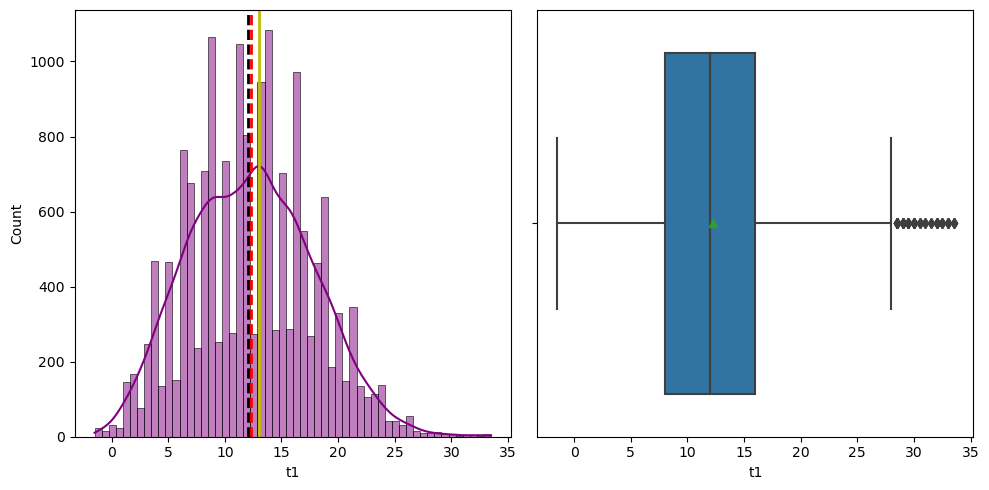

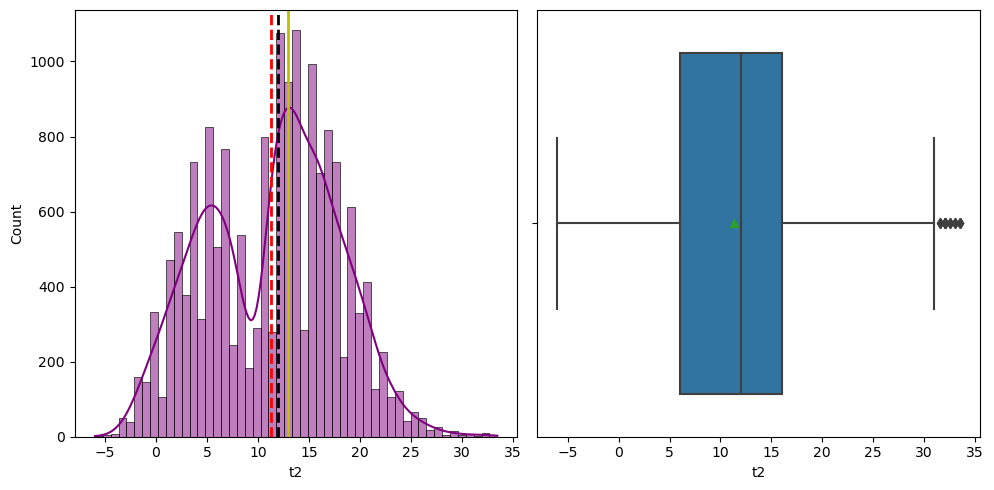

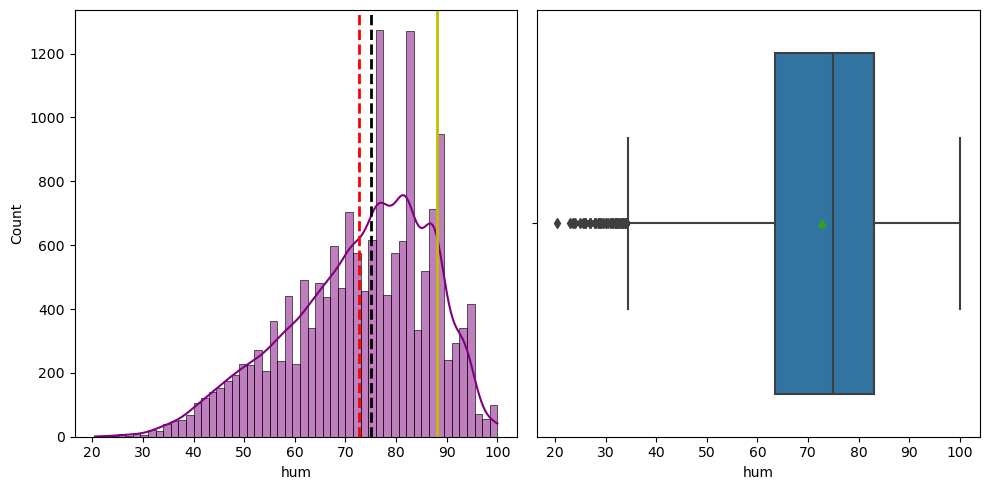

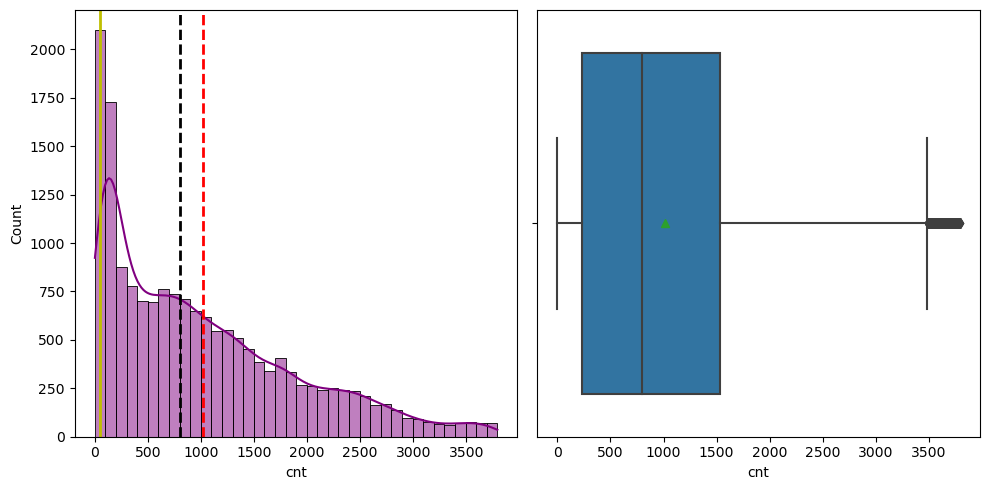

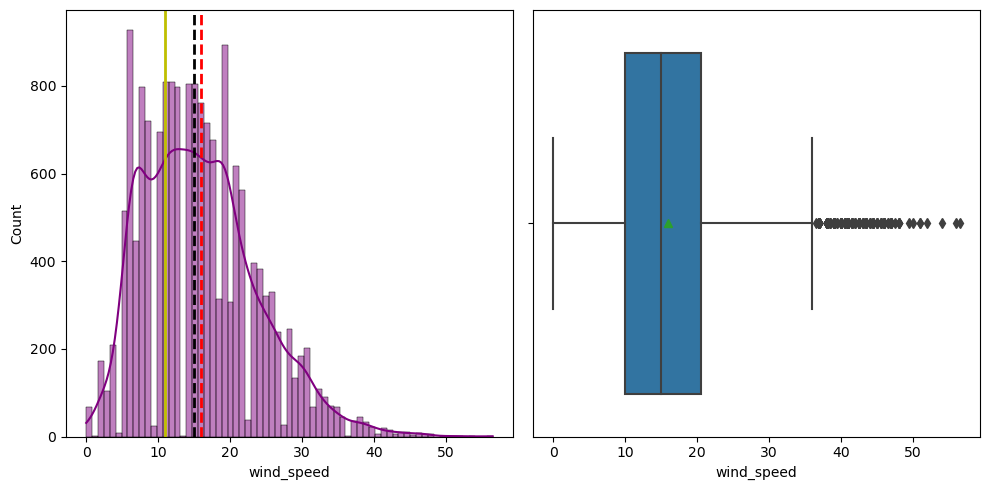

In [44]:
for i in num_cols:
    num_feat(bike_data[i])
    

In [45]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' wise sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

In [46]:
bike_data.columns


Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [47]:
cat_cols = ['season', 'is_holiday', 'is_weekend', 'weather_code']
cat_cols

['season', 'is_holiday', 'is_weekend', 'weather_code']

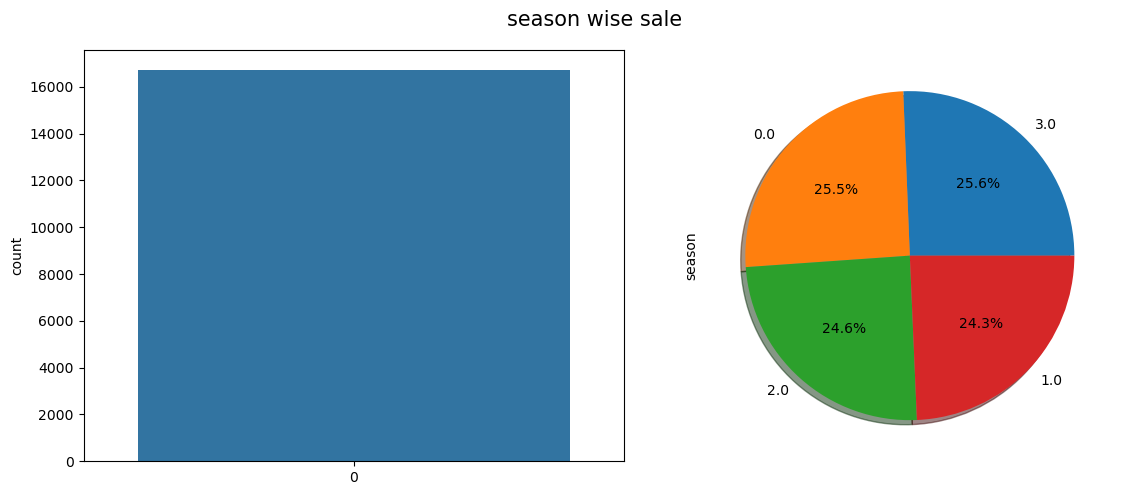

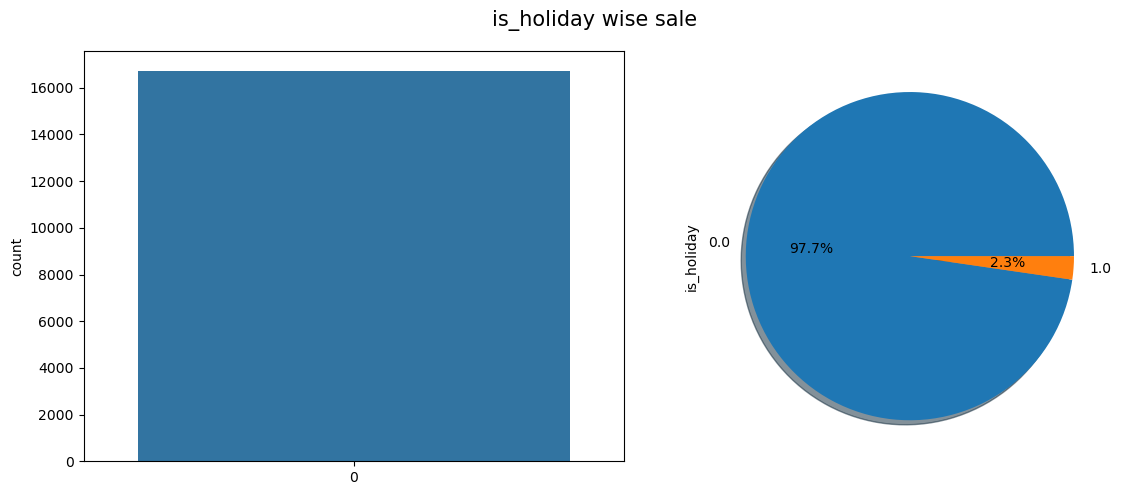

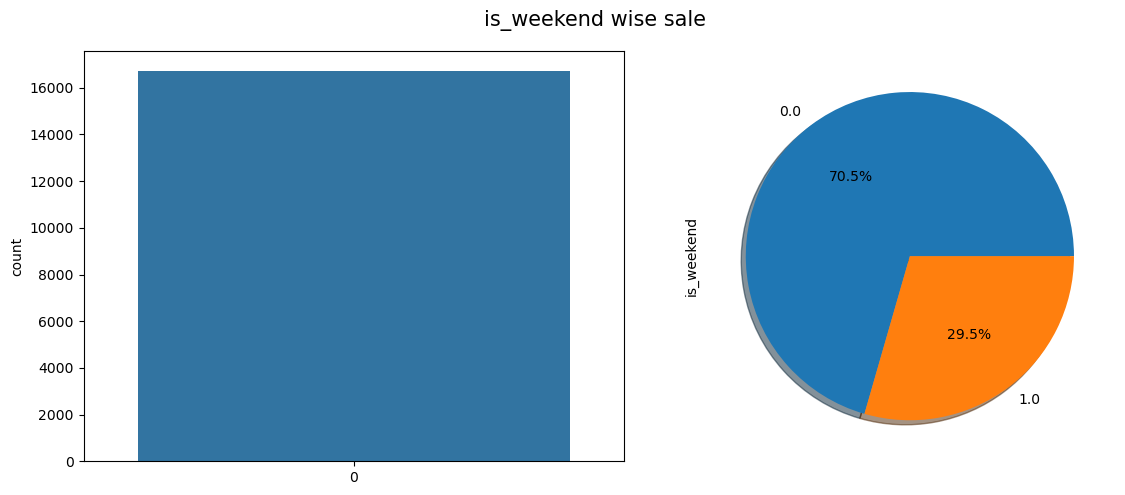

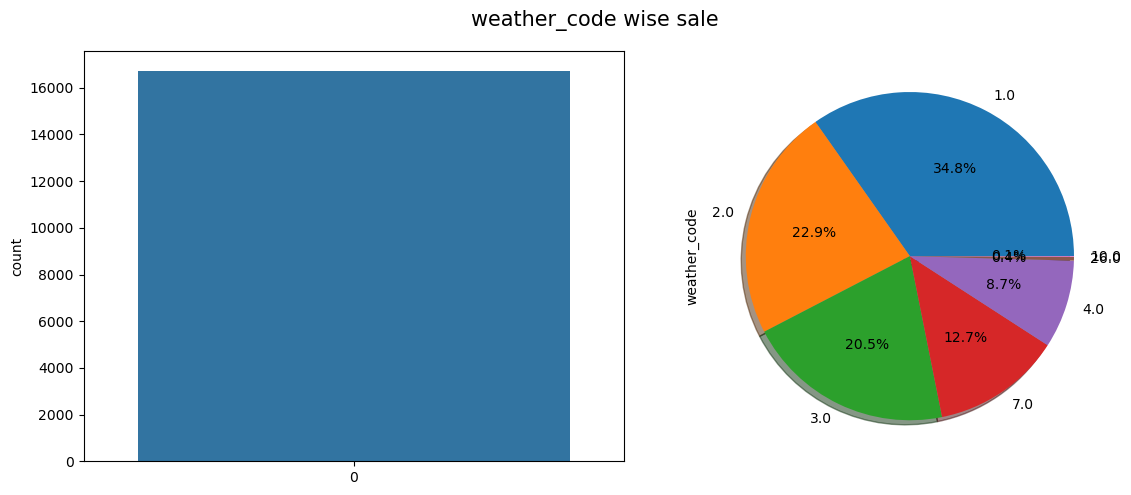

In [48]:
for i in cat_cols:
    cat_feat(bike_data[i])

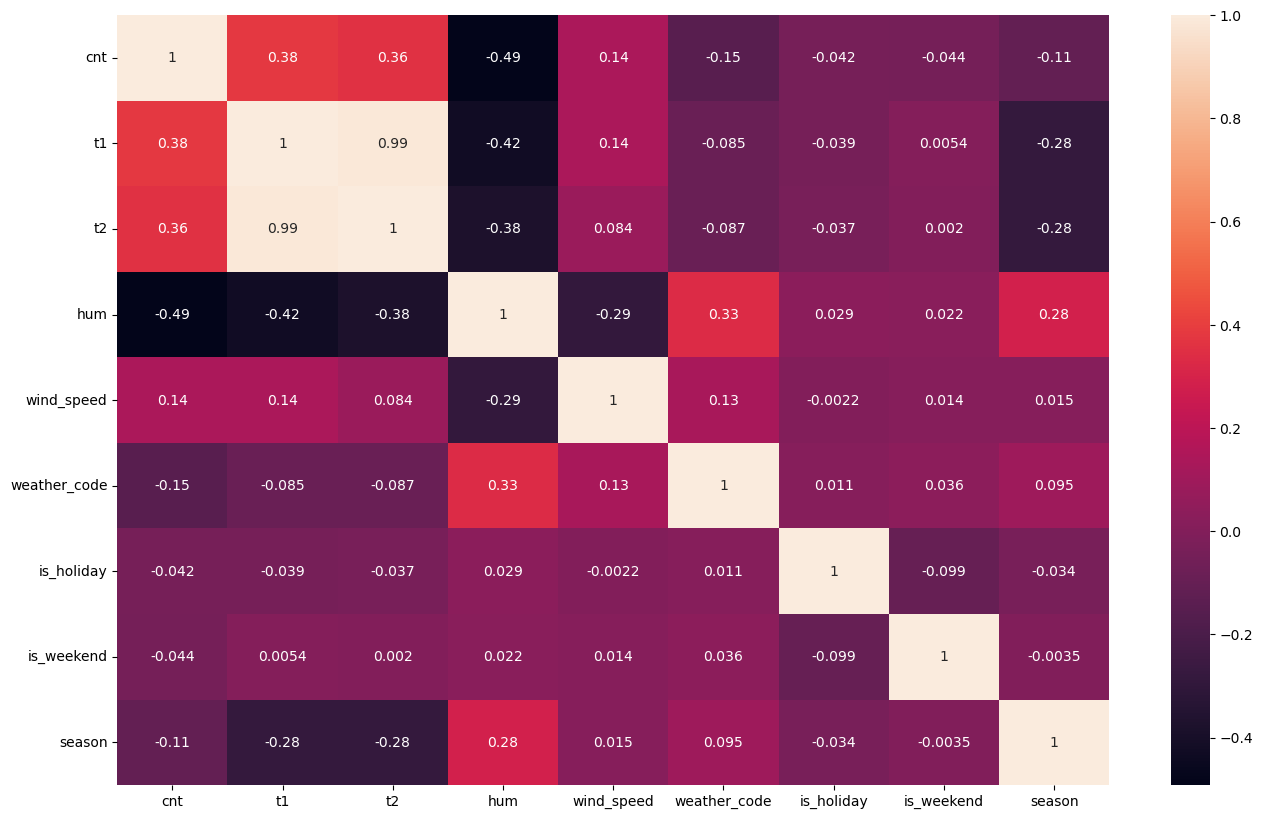

In [49]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

In [50]:
bike_data.shape


(16739, 10)

In [51]:
bike_data['is_weekend'].value_counts(normalize = True) * 100


0.0    70.535874
1.0    29.464126
Name: is_weekend, dtype: float64

In [52]:
bike_data['is_weekend'].value_counts()


0.0    11807
1.0     4932
Name: is_weekend, dtype: int64

In [53]:
working_data = bike_data[bike_data['is_weekend'] == 1].sample(4500, replace = False)
non_working_data = bike_data[bike_data['is_weekend'] == 0].sample(4500, replace = False)

In [54]:
working_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
14836,2016-09-18 12:00:00,2415,18.0,18.0,73.0,11.0,3.0,0.0,1.0,2.0
7841,2015-11-28 09:00:00,817,7.0,4.0,66.0,20.0,1.0,0.0,1.0,2.0
14677,2016-09-11 21:00:00,868,16.0,16.0,63.0,7.0,1.0,0.0,1.0,2.0
15474,2016-10-15 02:00:00,319,12.0,12.0,82.0,2.0,4.0,0.0,1.0,2.0
13837,2016-08-06 05:00:00,112,15.0,15.0,82.0,11.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6870,2015-10-18 13:00:00,2079,15.0,15.0,63.0,14.0,3.0,0.0,1.0,2.0
1167,2015-02-21 17:00:00,1266,6.5,4.5,63.5,10.0,2.0,0.0,1.0,3.0
7685,2015-11-21 21:00:00,306,2.5,-2.0,58.0,17.0,1.0,0.0,1.0,2.0
15145,2016-10-01 09:00:00,679,14.0,14.0,82.0,5.0,7.0,0.0,1.0,2.0


In [55]:
non_working_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
12942,2016-06-29 18:00:00,3573,16.0,16.0,83.0,24.0,3.0,0.0,0.0,1.0
3820,2015-06-12 15:00:00,1805,23.5,23.5,55.5,17.0,1.0,0.0,0.0,1.0
5387,2015-08-17 02:00:00,133,16.0,16.0,68.0,4.0,1.0,0.0,0.0,1.0
7388,2015-11-09 04:00:00,61,11.0,11.0,77.0,17.0,1.0,0.0,0.0,2.0
12434,2016-06-07 23:00:00,540,16.0,16.0,59.0,9.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5987,2015-09-11 02:00:00,112,13.5,13.5,91.0,7.0,1.0,0.0,0.0,2.0
5238,2015-08-10 21:00:00,1065,20.0,20.0,75.5,15.0,2.0,0.0,0.0,1.0
15882,2016-11-01 03:00:00,67,9.0,9.0,97.0,2.0,2.0,0.0,0.0,2.0
7816,2015-11-27 08:00:00,3425,12.0,12.0,88.0,19.0,3.0,0.0,0.0,2.0


Checking assumptions of the test (Normality, Equal Variance)

Using visualization methods - Histogram, Q-Q plot
Using statistical methods like levene’s test, Shapiro-wilk test

In [56]:
round(working_data['cnt'].std()**2,2), round(non_working_data['cnt'].std()**2 ,2)
#Observations: The variance is not equal for both the samples.


(792625.33, 781651.57)

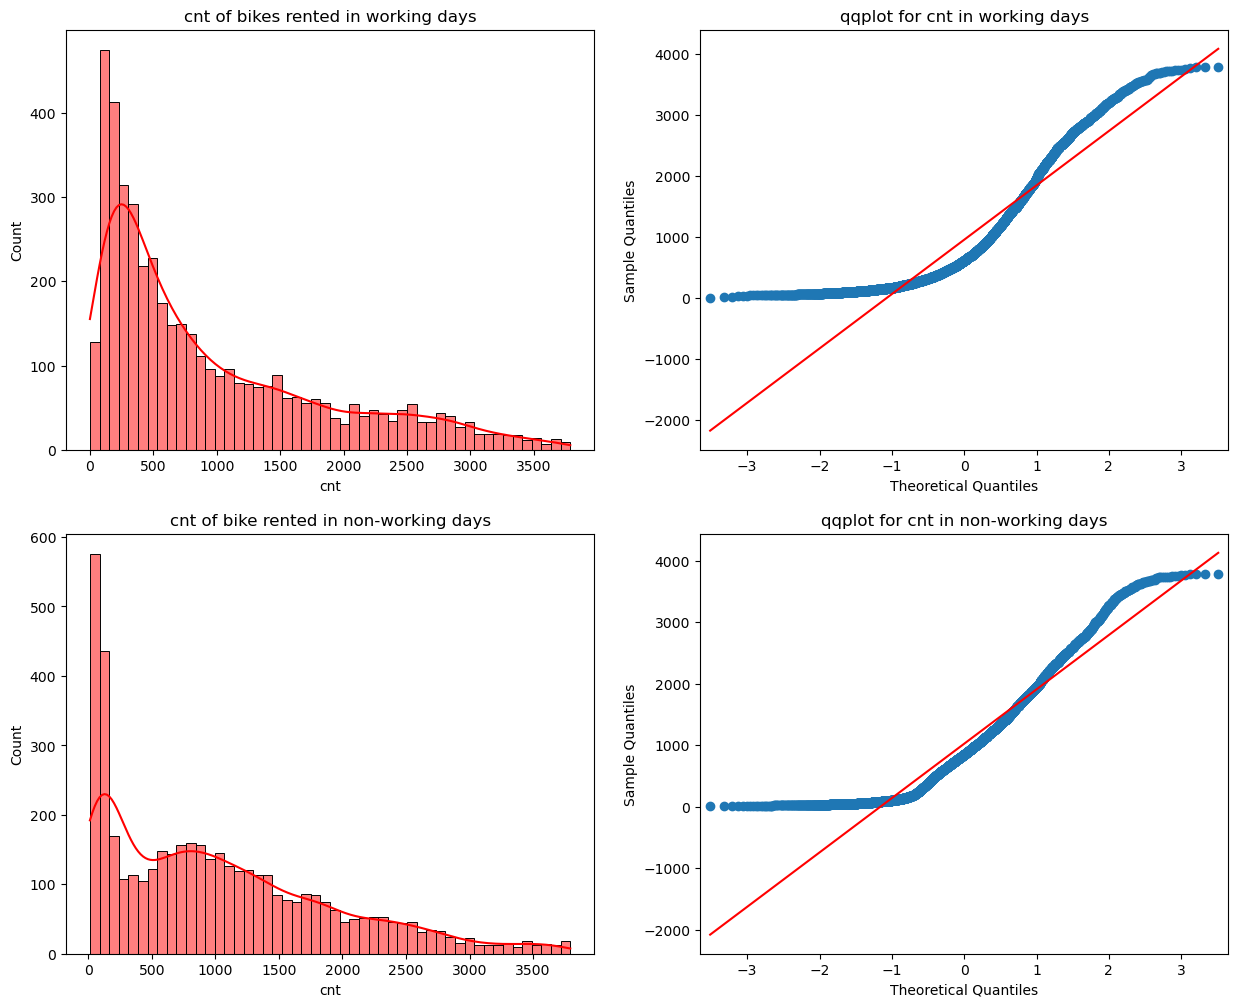

In [57]:
#Checking the normality
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = working_data, x = 'cnt' , bins = 50, kde = True, ax = ax1, color = 'red')
ax1.set_title('cnt of bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(working_data['cnt'], line = 's', ax = ax2)
ax2.set_title('qqplot for cnt in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = non_working_data, x = 'cnt' , bins = 50, kde = True, ax = ax3, color = 'red')
ax3.set_title('cnt of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(non_working_data['cnt'], line = 's', ax = ax4)
ax4.set_title('qqplot for cnt in non-working days')

plt.show()


In [58]:
# Calculating the p-value and test- statistics usinging ttest_ind() for this right skwed distribution sample.
# Alternative == greater as it's right skewed and one-sided
t_test, p_value = stats.ttest_ind(working_data['cnt'],non_working_data['cnt'],
                                  alternative='greater', equal_var = False)
t_test, p_value

(-3.8777580895788875, 0.9999469130740841)

# Observations:

The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.Hence we will do log-transformation
We got a p-value of 0.99 which is greater than 0.05 and hence we can say that we fail to reject null hypothesis. We will confirm after log - transformation as well

# Applying log on the data - Log Normal Distribution


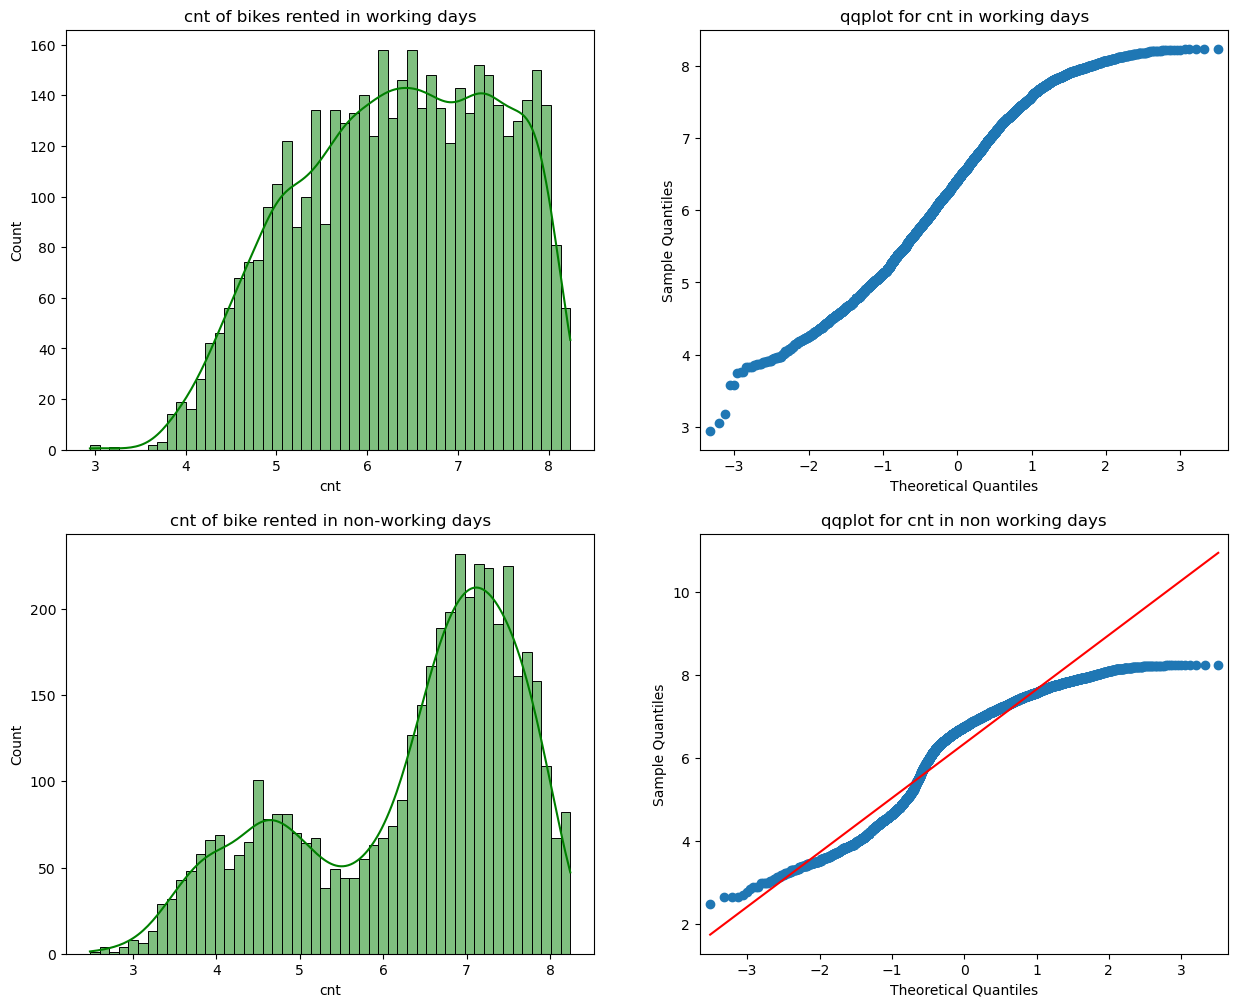

In [59]:
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = np.log(working_data['cnt']) , bins = 50, kde = True, ax = ax1, color = 'green')
ax1.set_title('cnt of bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(np.log(working_data['cnt']), line = 's', ax = ax2)
ax2.set_title('qqplot for cnt in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = np.log(non_working_data['cnt']) , bins = 50, kde = True, ax = ax3, color  = 'green')
ax3.set_title('cnt of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(np.log(non_working_data['cnt']), line = 's', ax = ax4)
ax4.set_title('qqplot for cnt in non working days')

plt.show()

In [60]:
round(np.log(working_data['cnt']).std()**2,2), round(np.log(non_working_data['cnt']).std()**2 ,2)


(nan, 1.71)

## Observations: After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.

In [61]:
sample_w_log = np.log(working_data['cnt']).sample(4500)
sample_nw_log = np.log(non_working_data['cnt']).sample(4500)

In [62]:
sample_w_log

14210    6.565265
345      6.541030
8204     6.740519
3034     7.896181
6372     7.841493
           ...   
684      6.987490
17151    4.762174
11878    7.519692
1493     5.123964
13871    8.176110
Name: cnt, Length: 4500, dtype: float64

In [63]:
sample_nw_log

11933    4.430817
9998     7.102499
16368    6.598509
130      6.692084
14113    7.616776
           ...   
4635     7.533694
1556     5.945421
10876    5.062595
16969    7.010312
16760    7.996990
Name: cnt, Length: 4500, dtype: float64

In [64]:
statistic,p_value = stats.ttest_ind(sample_w_log,sample_nw_log , alternative = 'greater')
statistic,p_value

(nan, nan)

In [65]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

In [66]:
htResult(p_value)


Fail to Reject NULL HYPOTHESIS


In [67]:
stats.levene(sample_w_log, sample_nw_log, center='median')


LeveneResult(statistic=nan, pvalue=nan)

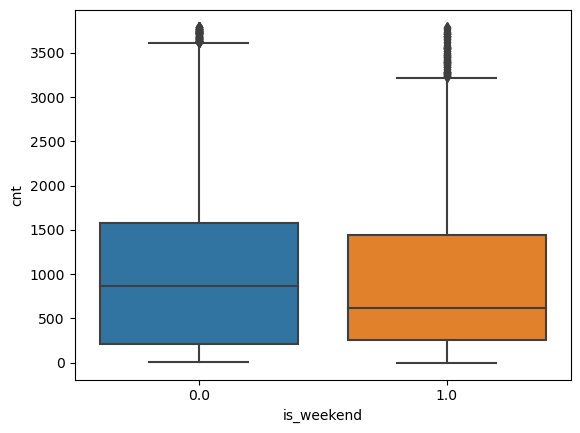

In [68]:
sns.boxplot(x='is_weekend', y='cnt', data=bike_data)
plt.show()

# Conclusion : As the p value > alpha(0.05) , we fail to reject H0 and thus we can say that the cnt of renting of bikes in both working and non-working days is equal. And we can confirm this using the boxplot as well

# Chi-square test to check if weather is dependent on the season
Assumptions:

1. Assumption 1: Both variables are categorical.
2. Assumption 2: All observations are independent.
3. Assumption 3: Cells in the contingency table are mutually exclusive.
4. Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.
5. It’s assumed that the expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and that no cell should have an expected value less than 1.

* H0 : Both weather_code and seasons are independent of each other

* Ha : There is dependency of weather_code on Seasons

* aplha = 0.05

In [115]:
bike_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [69]:
contigency_table = pd.crosstab(bike_data.weather_code,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,0.0,1.0,2.0,3.0,Total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
10.0,7,5,1,1,14
26.0,6,0,10,44,60
Total,4264,4070,4113,4292,16739


In [70]:
contigency_table = contigency_table.rename(columns = {'Total':'Row_total'})
contigency_table

season,0.0,1.0,2.0,3.0,Row_total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
10.0,7,5,1,1,14
26.0,6,0,10,44,60
Total,4264,4070,4113,4292,16739


In [71]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()


In [72]:
n

16739

In [73]:
exp

season,0.0,1.0,2.0,3.0,Row_total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
10.0,7,5,1,1,14
26.0,6,0,10,44,60
Total,4264,4070,4113,4292,16739


# A Chi-Square Test of Independence

* As we doing independence test for 2 categorical vaiarbles we are using Chi-squared test.
* Expected value of cells should be 5 or greater in at least 80% of cells & that no cell should have an expected value less than 1.
* We can use the following formula to calculate the expected values for each cell in the contingency table:
* Expected value = (row sum * column sum) / table sum.

In [74]:
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y]))/n ).round(2)
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1, 2, 3, 4, 5, 6 ], [0, 1, 2, 3]]
exp

season,0.0,1.0,2.0,3.0
weather_code,,,,
1.0,1482.05,1414.62,1429.56,1491.78
2.0,974.87,930.51,940.35,981.27
3.0,875.27,835.45,844.27,881.02
4.0,370.64,353.78,357.51,373.07
7.0,542.33,517.66,523.12,545.89
10.0,3.57,3.40,3.44,3.59
26.0,15.28,14.59,14.74,15.38


In [75]:
exp

season,0.0,1.0,2.0,3.0
weather_code,,,,
1.0,1482.05,1414.62,1429.56,1491.78
2.0,974.87,930.51,940.35,981.27
3.0,875.27,835.45,844.27,881.02
4.0,370.64,353.78,357.51,373.07
7.0,542.33,517.66,523.12,545.89
10.0,3.57,3.40,3.44,3.59
26.0,15.28,14.59,14.74,15.38


* Weather_code 10 has expeted counts less than 5, so we will drop it.¶


In [76]:
bike_data['weather_code'].value_counts()


1.0     5818
2.0     3827
3.0     3436
7.0     2129
4.0     1455
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [77]:
bike_data['season'].value_counts()


3.0    4292
0.0    4264
2.0    4113
1.0    4070
Name: season, dtype: int64

In [78]:
bike_data=bike_data[~(bike_data['weather_code']==10.0)]


In [79]:
bike_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [80]:
bike_data['weather_code'].value_counts()

1.0     5818
2.0     3827
3.0     3436
7.0     2129
4.0     1455
26.0      60
Name: weather_code, dtype: int64

In [81]:
contigency_table = pd.crosstab(bike_data.weather_code,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,0.0,1.0,2.0,3.0,Total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
26.0,6,0,10,44,60
Total,4257,4065,4112,4291,16725


* Weather_code 26 has expeted counts less than 5, so we will drop it.¶


In [82]:
bike_data=bike_data[~(bike_data['weather_code']==26.0)]


In [83]:
bike_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [84]:
bike_data['weather_code'].value_counts()

1.0    5818
2.0    3827
3.0    3436
7.0    2129
4.0    1455
Name: weather_code, dtype: int64

In [85]:
contigency_table = pd.crosstab(bike_data.weather_code,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,0.0,1.0,2.0,3.0,Total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
Total,4251,4065,4102,4247,16665


In [86]:
contigency_table = contigency_table.rename(columns = {'Total':'Row_total'})
contigency_table

season,0.0,1.0,2.0,3.0,Row_total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
Total,4251,4065,4102,4247,16665


In [87]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y]))/n ).round(2)
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1, 2, 3, 4 ], [0, 1,2,3]]
exp

season,0.0,1.0,2.0,3.0
weather_code,,,,
1.0,1484.09,1419.15,1432.07,1482.69
2.0,976.21,933.50,942.00,975.29
3.0,876.47,838.12,845.75,875.65
4.0,371.15,354.91,358.14,370.80
7.0,543.08,519.32,524.04,542.57


* No Weather_code has expeted counts less than 5, so we will continue with Chi Sqaure test¶


In [88]:
weather_code_season_dep = pd.crosstab(bike_data['weather_code'], bike_data['season'])
weather_code_season_dep

season,0.0,1.0,2.0,3.0
weather_code,,,,
1.0,1675,1656,1279,1208
2.0,917,1024,976,910
3.0,790,727,966,953
4.0,326,215,366,548
7.0,543,443,515,628


In [89]:
stat, p_value, dof, expected = stats.chi2_contingency(weather_code_season_dep)
stat, p_value, dof, expected

(366.8215668058749,
 3.940835015767994e-71,
 12,
 array([[1484.08748875, 1419.15211521, 1432.06936694, 1482.6910291 ],
        [ 976.21224122,  933.49864986,  941.99543954,  975.29366937],
        [ 876.47380738,  838.12421242,  845.75289529,  875.64908491],
        [ 371.14941494,  354.909991  ,  358.14041404,  370.80018002],
        [ 543.0770477 ,  519.3150315 ,  524.04188419,  542.5660366 ]]))

In [90]:
alpha = 0.05
if p_value >= alpha: 
    print('We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"')
else:
    print('We reject the Null Hypothesis Ho')

We reject the Null Hypothesis Ho


* p- value (3.940835015767994e-71) < alpha(0.05) --> so we can reject H0 Which means weather_code and seasons have a significant dependency and Both weather_code and seasons are not independent of each other

* We can conclude that we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather_code and Seasons are dependent on each other

* ANNOVA to check if no. of cycles rented is similar or different in different weather_code and season
Assumptions:

* Normality – that each sample is taken from a normally distributed population
* Sample independence – that each sample has been drawn independently of the other samples
* Variance equality – that the variance of data in the different groups should be the same

* Your dependent variable – here, “cnt”, should be continuous – that is, measured on a scale which can be subdivided using increments
1. weather_code

* H0 (Null Hupothesis) : cnt of bikes rented is same in diffrent types of weather_code

* Ha (Alternate Hupothesis) : cnt of bikes rented is different in diffrent types of weather_code

* alpha: 0.05

In [91]:
bike_dcopy['weather_code'].value_counts()


1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

* Checking assumptions of the test (Normality, Equal Variance)



In [92]:
from scipy.stats import shapiro
def normality_check(series, alpha=0.05):
    _, p_value = shapiro(series)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

<Axes: xlabel='cnt', ylabel='Count'>

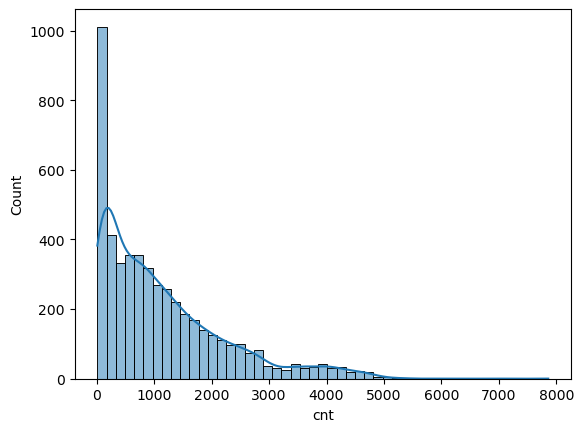

In [93]:
sns.histplot(bike_dcopy['cnt'].sample(5000), kde = True)


<Axes: xlabel='cnt', ylabel='Count'>

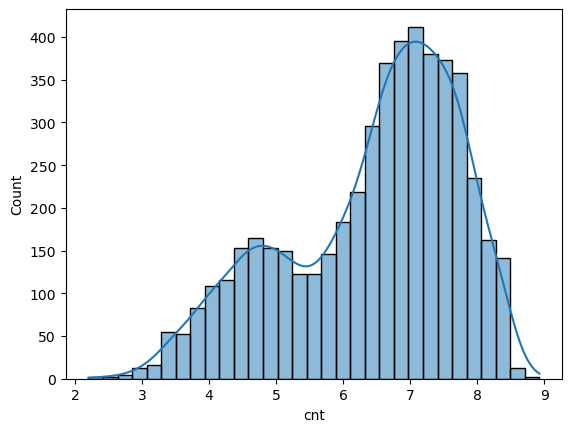

In [94]:
#Taking the log of the above distribution sample as it's not normal.

sns.histplot(np.log(bike_dcopy['cnt'].sample(5000)), kde = True)


In [95]:
# H0: Series is Normal
# Ha : Series is not Normal
# alpha  = 0.05
stats.shapiro(bike_dcopy['cnt'].sample(5000))


ShapiroResult(statistic=0.8683241009712219, pvalue=0.0)

## Observations: 
* Even after taking log, the distribution is not exactly normal. So our assumption doesn't holds true. Also, we have confirmed with the statistical test -Shapiro wik test that the series is not normal.Still we will be going ahead with the test just to check the results.

In [96]:
# Removing the weather_code type 12.0 and 10.0 as it's variance id diffrent than others and will fail our assumptions
bike_dcopy=bike_dcopy[~(bike_dcopy['weather_code']==10.0) ] 
bike_dcopy=bike_dcopy[~(bike_dcopy['weather_code']==26.0) ]

In [97]:
bike_dcopy['weather_code'].value_counts()


1.0    6150
2.0    4034
3.0    3551
7.0    2141
4.0    1464
Name: weather_code, dtype: int64

# Normality Test:
* We will perform normality check using Shapiro test.

* The hypothesis of this test are:

* Null Hypothesis Ho - series is normal
* Alternative Hypothesis Ha - series is not normal

In [98]:
normality_check(bike_dcopy['weather_code'].sample(1400, replace = True))


p value = 1.4795189446034284e-40
We reject the Null Hypothesis Ho


* Equality of Variance Test:
* We will perform equivalence check for using using Levene's test.

* The hypothesis of this test are:

* Null Hypothesis Ho - Variances are equal
* Alternative Hypothesis Ha - Variances are not equal

In [99]:
bike_dcopy.groupby(['weather_code'])['cnt'].describe() # Variance is different for diff weather_code


,count,mean,std,min,25%,50%,75%,max
weather_code,,,,,,,,
1.0,6150.0,1162.088943,1187.218019,10.0,196.0,745.0,1767.0,7860.0
2.0,4034.0,1496.177491,1085.026155,16.0,747.0,1291.0,2069.0,7531.0
3.0,3551.0,1195.124472,1014.745557,12.0,430.0,964.0,1673.5,5033.0
4.0,1464.0,635.230874,751.408441,14.0,116.0,355.0,875.0,4626.0
7.0,2141.0,712.966371,764.879409,0.0,150.0,471.0,981.0,6585.0


In [100]:
from scipy.stats import levene
def variance_check(series1, series2, series3,series4,series5, alpha=0.05):
    _, p_value = levene(series1, series2, series3)
    print(f'p value = {p_value}')
    if (p_value >= alpha).all():
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [101]:
series1 =   bike_dcopy[bike_dcopy['weather_code'] == 1]['cnt'].sample(1400)
series2 =       bike_dcopy[bike_dcopy['weather_code'] == 2]['cnt'].sample(1400)
series3 =          bike_dcopy[bike_dcopy['weather_code'] == 3]['cnt'].sample(1400)
series4 =       bike_dcopy[bike_dcopy['weather_code'] == 4]['cnt'].sample(1400)
series5 =     bike_dcopy[bike_dcopy['weather_code'] == 7]['cnt'].sample(1400)


In [102]:
series1

14984    3216
15357     140
2312     2311
309       386
12240     777
         ... 
2548     1288
4090     1296
1510      394
2972       71
14686     805
Name: cnt, Length: 1400, dtype: int64

In [103]:
series2

9798      868
3250     3146
13034    2963
4839      139
4421     2344
         ... 
7179     2115
14457      64
9584      985
2013      424
10212     771
Name: cnt, Length: 1400, dtype: int64

In [104]:
series3

12659    3816
6606      713
6560     4334
16516    1470
2065     3297
         ... 
9859      298
12519    2454
6175      153
8459      898
2000     1050
Name: cnt, Length: 1400, dtype: int64

In [105]:
series4

10389      31
15716      50
14853     159
6972     1801
10625     520
         ... 
6999      653
12100     101
13765      60
1461      371
17011      81
Name: cnt, Length: 1400, dtype: int64

In [106]:
series5

12449    1167
10712      33
12979    1153
11731    2042
10713      14
         ... 
11748    1128
7734      378
3243      831
1691      774
7269       81
Name: cnt, Length: 1400, dtype: int64

In [107]:
variance_check(series1, series2, series3,series4,series5)


p value = 2.0727047364373654e-06
We reject the Null Hypothesis Ho


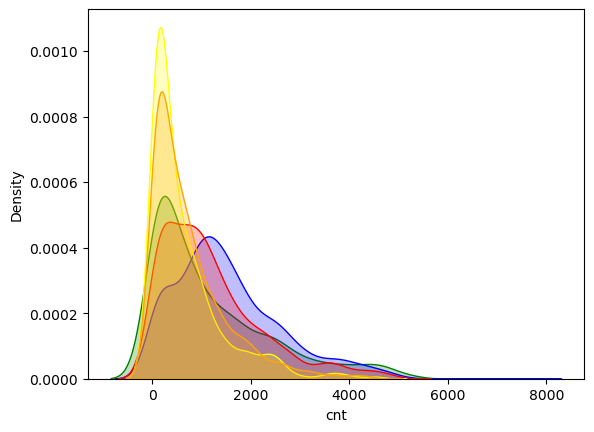

In [108]:
sns.kdeplot(series1,color = 'green',shade='green')
sns.kdeplot(series2,color = 'blue',shade = 'blue')
sns.kdeplot(series3,color = 'red',shade = 'red')
sns.kdeplot(series4,color = 'yellow',shade = 'yellow')
sns.kdeplot(series5,color = 'orange',shade = 'orange')
plt.show()

* Although both our assumption for normality and varaince failed, we will continue with One way Annova just to check what's the result.

In [109]:
stat,p = stats.f_oneway(bike_dcopy[bike_dcopy['weather_code'] == 1]['cnt'].sample(1400),
                        bike_dcopy[bike_dcopy['weather_code'] == 2]['cnt'].sample(1400),
                        bike_dcopy[bike_dcopy['weather_code'] == 3]['cnt'].sample(1400),
                       bike_dcopy[bike_dcopy['weather_code'] == 4]['cnt'].sample(1400),
                       bike_dcopy[bike_dcopy['weather_code'] == 7]['cnt'].sample(1400))
stat,p

(182.67689708146023, 3.99791650497456e-149)

In [110]:
test, p_val= stats.levene(bike_dcopy[bike_dcopy['weather_code'] == 1]['cnt'].sample(1400),
                        bike_dcopy[bike_dcopy['weather_code'] == 2]['cnt'].sample(1400),
                        bike_dcopy[bike_dcopy['weather_code'] == 3]['cnt'].sample(1400),
                       bike_dcopy[bike_dcopy['weather_code'] == 4]['cnt'].sample(1400),
                       bike_dcopy[bike_dcopy['weather_code'] == 7]['cnt'].sample(1400))
test, p_val

(91.00494801625722, 1.523224657763606e-75)

* Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in weather_code.

# 2. Seasons

* H0 (Null Hupothesis) : cnt of bikes rented is same in different types of seasons

* Ha (Alternate Hupothesis) : cnt of bikes rented is different in different types of seasons

* alpha: 0.05

In [111]:
bike_dcopy['season'].value_counts()


1.0    4382
0.0    4381
2.0    4292
3.0    4285
Name: season, dtype: int64

In [112]:
bike_dcopy.groupby(['season'])['cnt'].describe() # The variance is different for all the 4 seasons


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
0.0,4381.0,1105.729057,1039.750044,0.0,235.00,825.0,1625.00,5322.0
1.0,4382.0,1465.654952,1250.962840,12.0,372.00,1216.5,2208.75,7860.0
2.0,4292.0,1181.781221,1095.625343,9.0,299.75,900.5,1718.25,5422.0
3.0,4285.0,827.035939,808.228098,10.0,190.00,640.0,1138.00,4415.0


In [113]:
stat,p = stats.f_oneway(bike_dcopy[bike_dcopy['season'] == 1]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 2]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 3]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 0]['cnt'].sample(4000))
stat,p

(241.6497906629951, 2.318967759455935e-153)

In [114]:
test, p_val= stats.levene(bike_dcopy[bike_dcopy['season'] == 1]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 2]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 3]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 0]['cnt'].sample(4000))
test, p_val

(206.95097894435307, 1.0590394116800088e-131)

# Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in season.

# 2 sample t-test:
The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.Hence we will do log-transformation
We got a p-value of 0.91 which is greater than 0.05 and hence we can say that we can accept the null hypothesis. We will confirm after log - transformation as well
After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.
Conclusion : As the p value > alpha(0.05) , we accept H0 and thus we can say that the cnt of renting of bikes in both working and non-working days is equal. And we can confirm this using the boxplot as well.
# Chi-Square test:
p- value (6.734426550686341e-08) < alpha(0.05) --> so we can reject H0 Which means weather_code and seasons have a significant dependency and Both weather_code and seasons are not independent of each other
We can conclude that our (chi_stat > chi_critical), we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather_code and Seasons are dependent on each other.
# One-way Anova:
Even after taking log, the distribution is not exactly normal. So our assumption doesn't holds true. Also, we have confirmed with the statistical test -Shapiro wilk test that the series is not normal. Still we will be going ahead with the test just to check the results.
As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in weather_code.
As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in season.